# Dispersed Image Trade Study

In [1]:
import pathlib

import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import quantity_support, ImageNormalize, LogStretch
from astropy.coordinates import SkyCoord
from astropy.wcs.utils import wcs_to_celestial_frame
import ndcube
from sunpy.map import extract_along_coord
from overlappy.io import read_overlappogram
from overlappy.util import color_lat_lon_axes

from mocksipipeline.detector.response import SpectrogramChannel
from mocksipipeline.detector.filter import ThinFilmFilter

## Effective Area Curves

The different configurations are:

0. Al, 100 nm w/o Au-Cr layer
1. Al, 100 nm
2. Al oxide, 100 nm
3. Al oxide, 200 nm
4. Al oxide with polymide, 200 nm
5. Al oxide with polymide, 300 nm

For case 0, we consider the case where there is no Au/Cr layer on the grating.

In [2]:
al_thin = ThinFilmFilter(elements='Al', thickness=100*u.nm)

In [3]:
al_thin_oxide = [
    ThinFilmFilter(elements='Al', thickness=93*u.nm),
    ThinFilmFilter(elements=['Al','O'], quantities=[2,3], thickness=7*u.nm),
]

In [4]:
al_thick_oxide = [
    ThinFilmFilter(elements='Al', thickness=192*u.nm),
    ThinFilmFilter(elements=['Al','O'], quantities=[2,3], thickness=8*u.nm),
]

In [5]:
polymide = ThinFilmFilter(elements=['C','H','N','O'],
                          quantities=[22,10,2,5],
                          density=1.43*u.g/u.cm**3,
                          thickness = 100*u.nm)

In [6]:
al_poly_thin_oxide = al_thin_oxide + [polymide]

In [7]:
al_poly_thick_oxide = al_thick_oxide + [polymide]

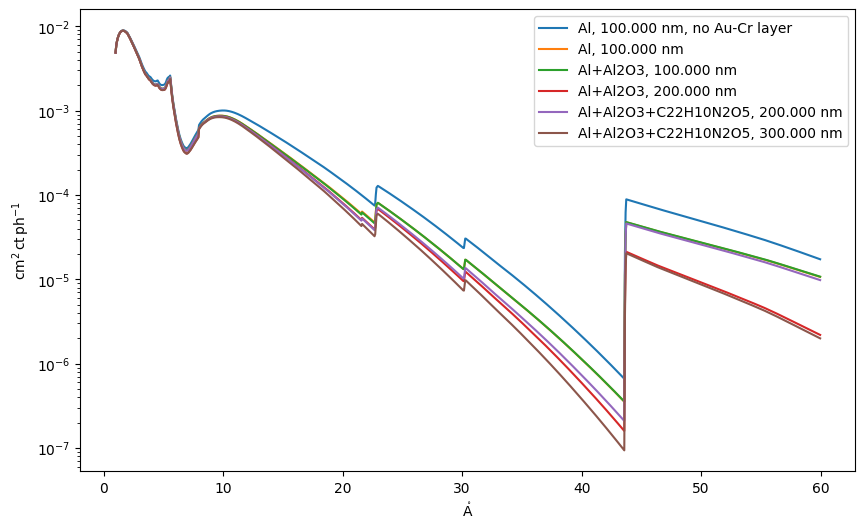

In [15]:
plt.figure(figsize=(10,6))
with quantity_support():
    ch_no_au_cr = SpectrogramChannel(0, al_thin, include_au_cr=False)
    plt.plot(ch_no_au_cr.wavelength, ch_no_au_cr.wavelength_response, label=ch_no_au_cr.filter_label+', no Au-Cr layer')
    for filt in [al_thin, al_thin_oxide, al_thick_oxide, al_poly_thin_oxide, al_poly_thick_oxide]:
        ch = SpectrogramChannel(0, filt)
        plt.plot(ch.wavelength, ch.wavelength_response, label=ch.filter_label)
plt.yscale('log')
plt.legend()

In [12]:
case_labels = {
    'Case 0': SpectrogramChannel(0, al_thin).filter_label+', no Au-Cr layer',
    'Case 1': SpectrogramChannel(0, al_thin).filter_label,
    'Case 2': SpectrogramChannel(0, al_thin_oxide).filter_label,
    'Case 3': SpectrogramChannel(0, al_thick_oxide).filter_label,
    'Case 4': SpectrogramChannel(0, al_poly_thin_oxide).filter_label,
    'Case 5': SpectrogramChannel(0, al_poly_thick_oxide).filter_label,
}

## Dispersed Images

In [10]:
from overlappy.io import read_overlappogram
from overlappy.util import strided_array
from ndcube import NDCube


def stack_components(components, wcs_index=0):
    layers = []
    for c in components:
        if isinstance(c, ndcube.NDCube):
            layers.append(c)
        else:
            layers.append(read_overlappogram(pathlib.Path(c)))
    data = np.array([l.data[0] for l in layers]).sum(axis=0)
    wcs = layers[wcs_index].wcs
    data_strided = strided_array(data, layers[wcs_index].data.shape[0])
    return NDCube(data_strided,
                  wcs=wcs,
                  unit=layers[wcs_index].unit,
                  meta=layers[wcs_index].meta)

In [11]:
top_dir = pathlib.Path('/home/ubuntu/pipeline-runs/dispersed-filter-trade-study')

### Case 0--Al thin, no Au-Cr coating

This is the nominal case.

In [12]:
dispersed_case0 = stack_components(
    sorted(list((top_dir / 'Al_100.000nm_no_au_cr/').glob('*.fits'))),
    wcs_index=2
)

(<astropy.visualization.wcsaxes.coordinate_helpers.CoordinateHelper at 0x7f592bbc3a60>,
 <astropy.visualization.wcsaxes.coordinate_helpers.CoordinateHelper at 0x7f592bbda050>)

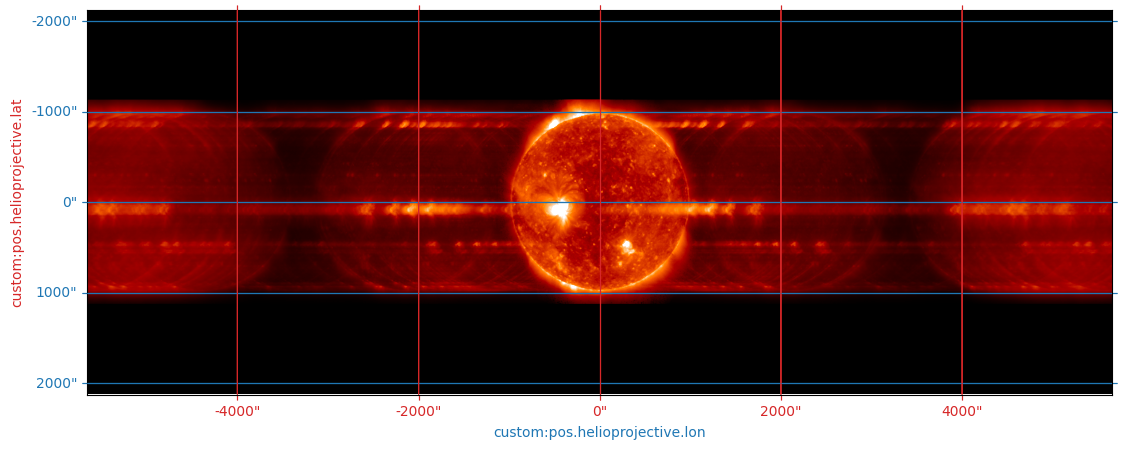

In [13]:
norm = ImageNormalize(vmin=0,vmax=50,stretch=LogStretch())
fig = plt.figure(figsize=(15,5))
cropped_cube = dispersed_case0[0,:751,:]
ax = fig.add_subplot(111, projection=cropped_cube.wcs)
cropped_cube.plot(
    axes=ax,
    norm=norm,
    data_unit='ph / (pix h)',
    cmap='hinodexrt',
)
color_lat_lon_axes(ax)

## Case 1

Include Au-Cr coating on grating

In [14]:
dispersed_case1 = stack_components(
    sorted(list((top_dir / 'Al_100.000nm/').glob('*.fits'))),
    wcs_index=2
)

(<astropy.visualization.wcsaxes.coordinate_helpers.CoordinateHelper at 0x7f592a2d6380>,
 <astropy.visualization.wcsaxes.coordinate_helpers.CoordinateHelper at 0x7f592a2d7a30>)

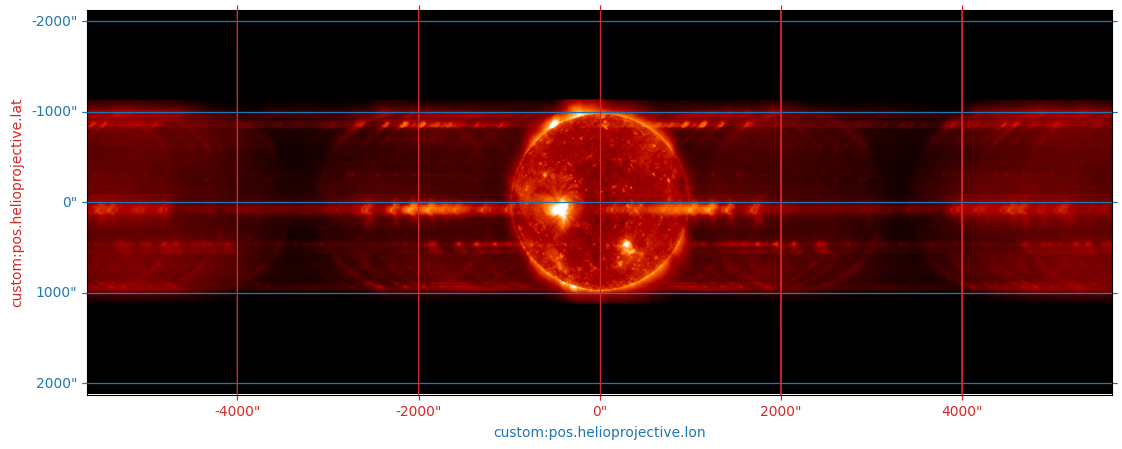

In [15]:
fig = plt.figure(figsize=(15,5))
cropped_cube = dispersed_case1[0,:751,:]
ax = fig.add_subplot(111, projection=cropped_cube.wcs)
cropped_cube.plot(
    axes=ax,
    norm=norm,
    data_unit='ph / (pix h)',
    cmap='hinodexrt',
)
color_lat_lon_axes(ax)

### Case 2

100 nm of aluminum with oxidation layer

In [17]:
dispersed_case2 = stack_components(
    sorted(list((top_dir / 'Al+Al2O3_100.000nm/').glob('*.fits'))),
    wcs_index=2
)

(<astropy.visualization.wcsaxes.coordinate_helpers.CoordinateHelper at 0x7f592a19d750>,
 <astropy.visualization.wcsaxes.coordinate_helpers.CoordinateHelper at 0x7f592a19f1f0>)

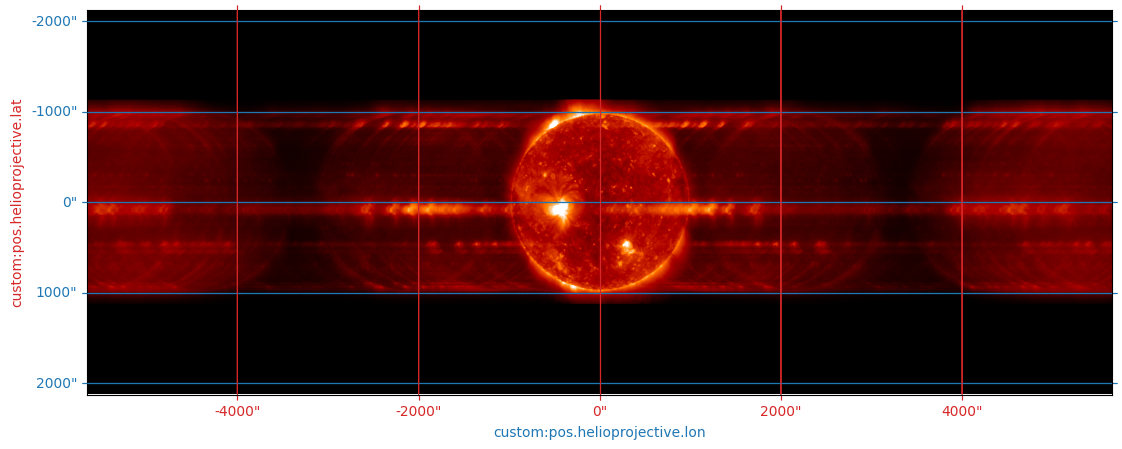

In [18]:
fig = plt.figure(figsize=(15,5))
cropped_cube = dispersed_case2[0,:751,:]
ax = fig.add_subplot(111, projection=cropped_cube.wcs)
cropped_cube.plot(
    axes=ax,
    norm=norm,
    data_unit='ph / (pix h)',
    cmap='hinodexrt',
)
color_lat_lon_axes(ax)

### Case 3

200 nm of aluminum with oxidation layer

In [19]:
dispersed_case3 = stack_components(
    sorted(list((top_dir / 'Al+Al2O3_200.000nm/').glob('*.fits'))),
    wcs_index=2
)

(<astropy.visualization.wcsaxes.coordinate_helpers.CoordinateHelper at 0x7f592a03e560>,
 <astropy.visualization.wcsaxes.coordinate_helpers.CoordinateHelper at 0x7f592a066440>)

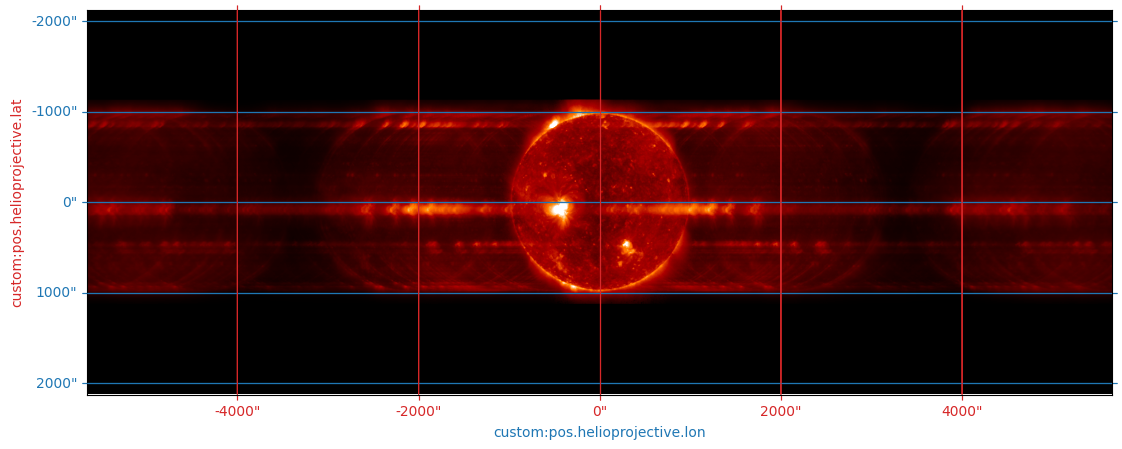

In [20]:
fig = plt.figure(figsize=(15,5))
cropped_cube = dispersed_case3[0,:751,:]
ax = fig.add_subplot(111, projection=cropped_cube.wcs)
cropped_cube.plot(
    axes=ax,
    norm=norm,
    data_unit='ph / (pix h)',
    cmap='hinodexrt',
)
color_lat_lon_axes(ax)

### Case 4

Al poly thin (100 nm of poly) with aluminum oxide

In [21]:
dispersed_case4 = stack_components(
    sorted(list((top_dir / 'Al+Al2O3+C22H10N2O5_200.000nm/').glob('*.fits'))),
    wcs_index=2
)

(<astropy.visualization.wcsaxes.coordinate_helpers.CoordinateHelper at 0x7f592a0faf80>,
 <astropy.visualization.wcsaxes.coordinate_helpers.CoordinateHelper at 0x7f5928840f70>)

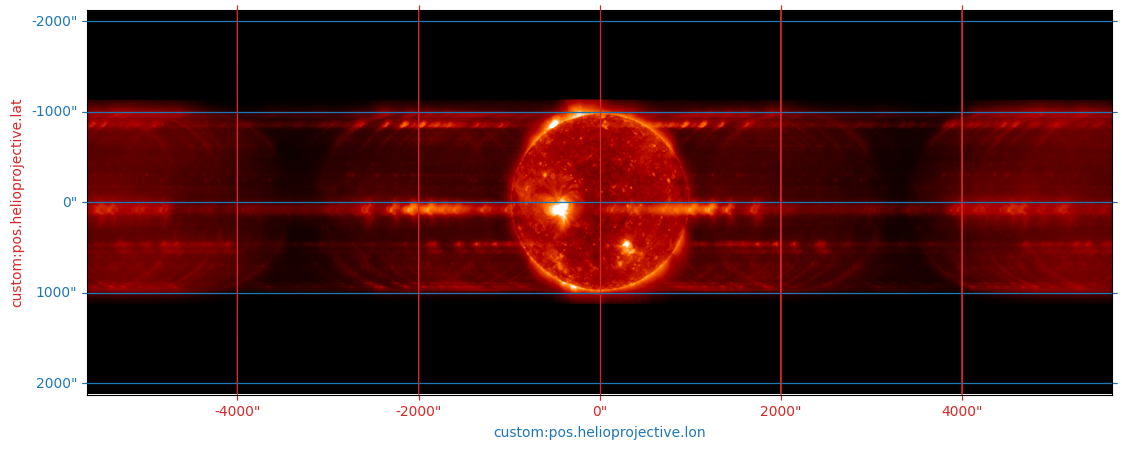

In [22]:
fig = plt.figure(figsize=(15,5))
cropped_cube = dispersed_case4[0,:751,:]
ax = fig.add_subplot(111, projection=cropped_cube.wcs)
cropped_cube.plot(
    axes=ax,
    norm=norm,
    data_unit='ph / (pix h)',
    cmap='hinodexrt',
)
color_lat_lon_axes(ax)

### Case 5

Al poly thick (200 nm) aluminum oxide

In [23]:
dispersed_case5 = stack_components(
    sorted(list((top_dir / 'Al+Al2O3+C22H10N2O5_300.000nm/').glob('*.fits'))),
    wcs_index=2
)

(<astropy.visualization.wcsaxes.coordinate_helpers.CoordinateHelper at 0x7f59288d7610>,
 <astropy.visualization.wcsaxes.coordinate_helpers.CoordinateHelper at 0x7f59288fee00>)

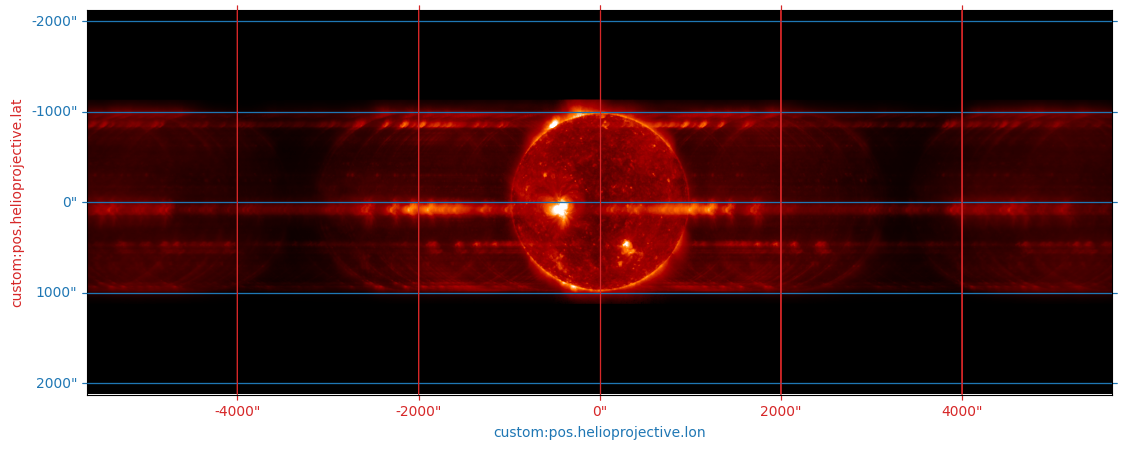

In [24]:
fig = plt.figure(figsize=(15,5))
cropped_cube = dispersed_case5[0,:751,:]
ax = fig.add_subplot(111, projection=cropped_cube.wcs)
cropped_cube.plot(
    axes=ax,
    norm=norm,
    data_unit='ph / (pix h)',
    cmap='hinodexrt',
)
color_lat_lon_axes(ax)

Now, compare line plots from all 5 cases

In [25]:
hpc_frame = wcs_to_celestial_frame(dispersed_case0.wcs)
coord = SkyCoord(Tx=75*u.arcsec, Ty=[-5600,5600]*u.arcsec, frame=hpc_frame)

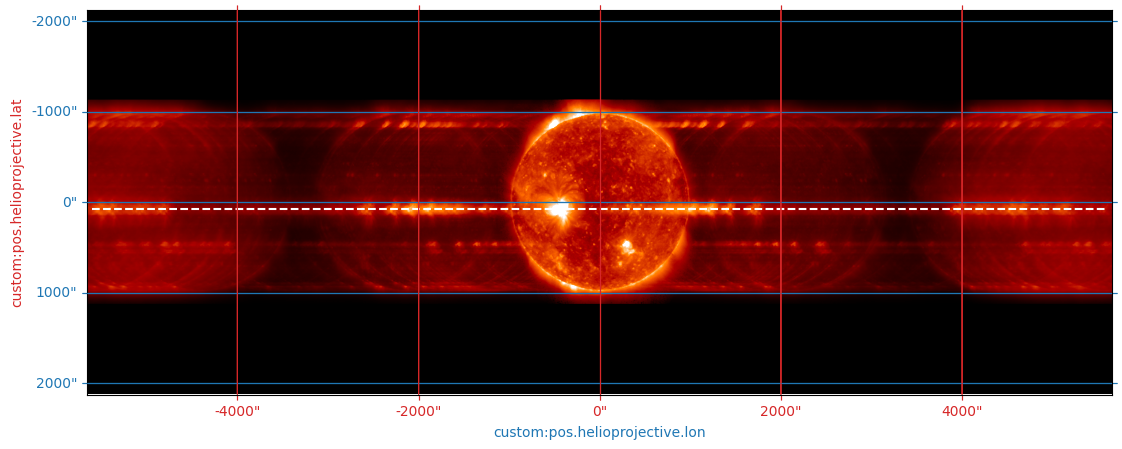

In [26]:
fig = plt.figure(figsize=(15,5))
cropped_cube = dispersed_case0[0,:751,:]
ax = fig.add_subplot(111, projection=cropped_cube.wcs)
cropped_cube.plot(
    axes=ax,
    norm=norm,
    data_unit='ph / (pix h)',
    cmap='hinodexrt',
)
color_lat_lon_axes(ax)
ax.plot_coord(coord, color='w', ls='--')

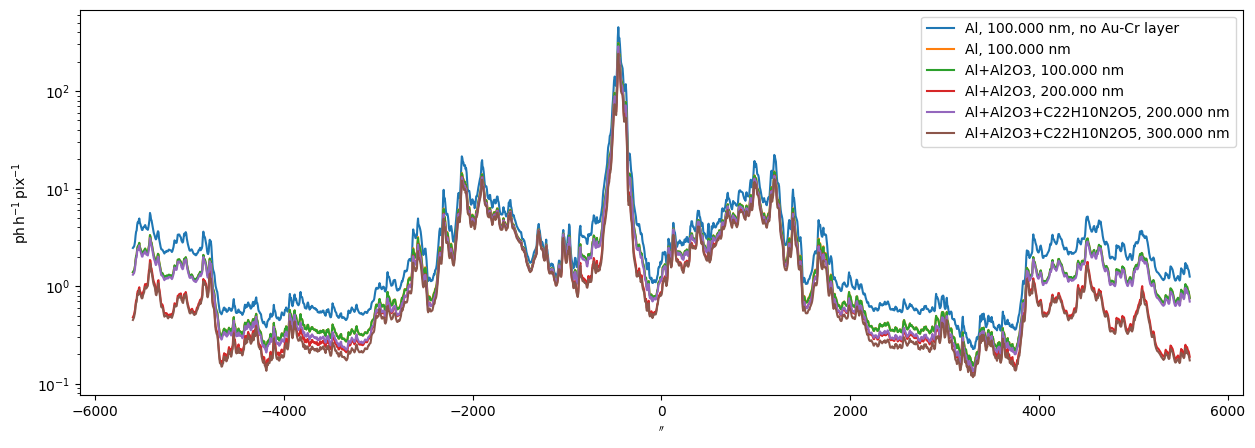

In [27]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
with quantity_support():
    for i,overlap in enumerate([dispersed_case0, dispersed_case1, dispersed_case2, dispersed_case3, dispersed_case4, dispersed_case5]):
        cropped_cube = overlap[0, :751, :]
        intensity, intensity_coord = extract_along_coord(cropped_cube, coord)
        ax.plot(intensity_coord.Ty, intensity.to('ph pix-1 h-1'), label=case_labels[f'Case {i}'])
    ax.legend()
    ax.set_yscale('log')

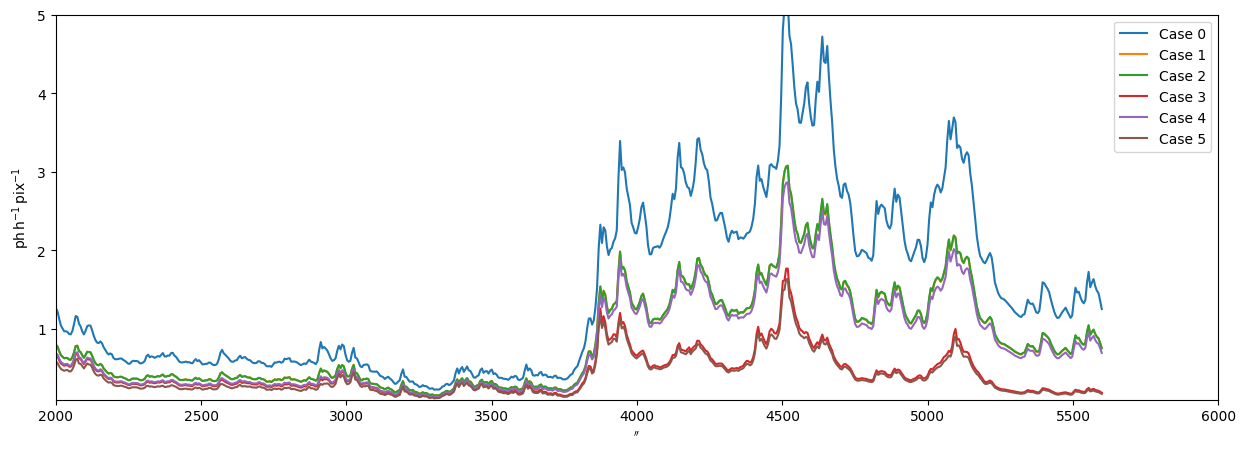

In [28]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
with quantity_support():
    for i,overlap in enumerate([dispersed_case0, dispersed_case1, dispersed_case2, dispersed_case3, dispersed_case4, dispersed_case5]):
        cropped_cube = overlap[0, :751, :]
        intensity, intensity_coord = extract_along_coord(cropped_cube, coord)
        ax.plot(intensity_coord.Ty, intensity.to('ph pix-1 h-1'), label=f'Case {i}')
    ax.legend()
    #ax.set_yscale('log')
    ax.set_xlim(2000,6000)
    ax.set_ylim(.1,5)